#  Boston Housing Prices

In [21]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import kurtosis, skew
import warnings
warnings.simplefilter('ignore')

# Make matplotlib show plots inline
%matplotlib inline

# Create our client's feature set for 
# which we will be predicting a selling price
CLIENT_FEATURES = [[13.44, 0.00, 18.587, 0, 0.7858, 4.8880, 82.00, \
                    1.655, 23, 566.0, 18.65, 400.05, 14.58]]

# Load the Boston Housing dataset into the boston variable : i didn't use the csv provided because it 
# contains all data in one column 
boston = datasets.load_boston()  

# Initialize the housing prices and housing features
housing_prices = boston.target
housing_features = boston.data
#Store in DataFrame
attributes = boston.feature_names #feature names
df_data = pd.DataFrame(housing_features, columns = attributes)
df_target = pd.DataFrame(housing_prices, columns =['MEDV'])
df_boston = pd.concat([df_data, df_target,], axis = 1) #concat data/target
print (boston.DESCR)

print ("*****************************")
print ("Summary\n")
feats = df_boston.shape[1]
obs = df_boston.shape[0]
print ("Number of Housing Features: ", feats)
print ("Number of Houses: ", obs)



print("Boston Housing dataset loaded successfully!")

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      


# Statistical Analysis and Data Exploration


In [2]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


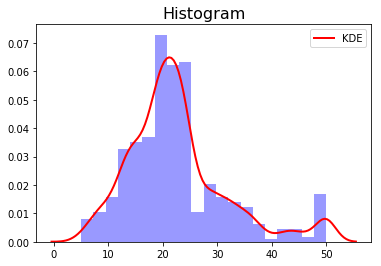

In [4]:
pl.title("Histogram",fontsize=16)
sns.distplot(housing_prices, kde=True,bins=20,color='b',
             kde_kws={"color": "r", "lw": 2, "label": "KDE"})

<Figure size 432x288 with 0 Axes>

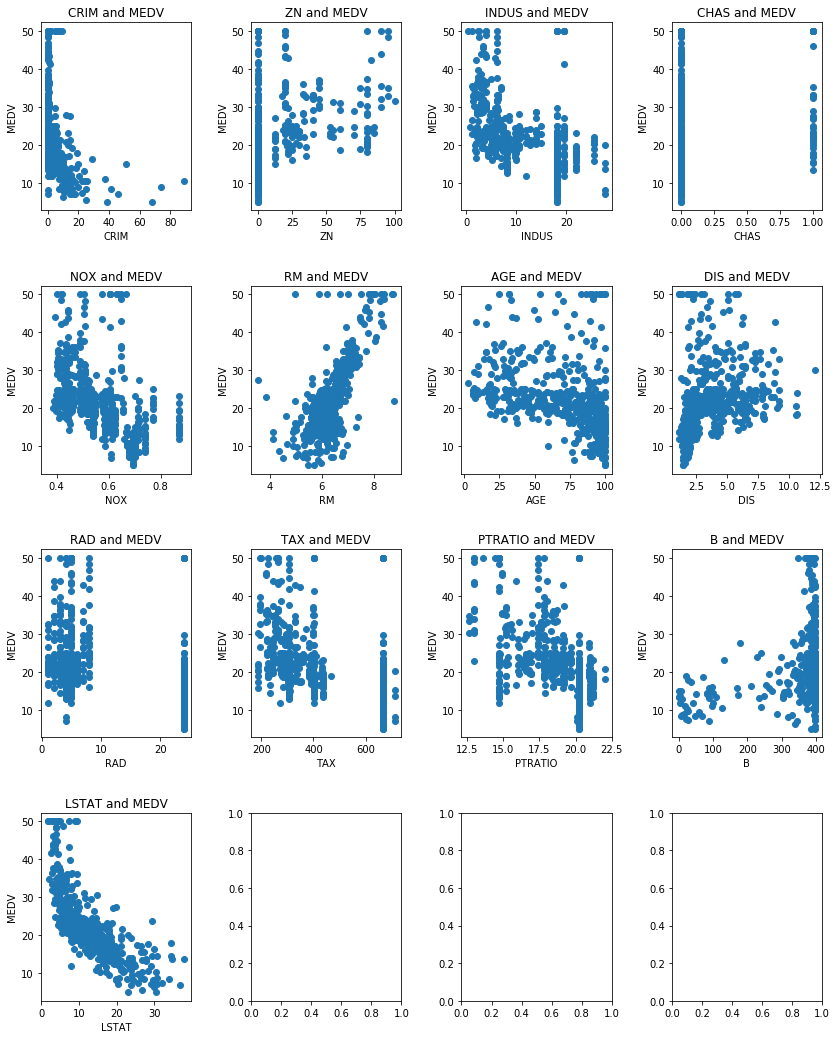

In [5]:
pl.figure()
fig,axes = pl.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(boston.feature_names.size):
    row, col = i // 4, i % 4
    axes[row][col].scatter(boston.data[:,i],boston.target)
    axes[row][col].set_title(boston.feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(boston.feature_names[i])        
    axes[row][col].set_ylabel('MEDV')
pl.show()

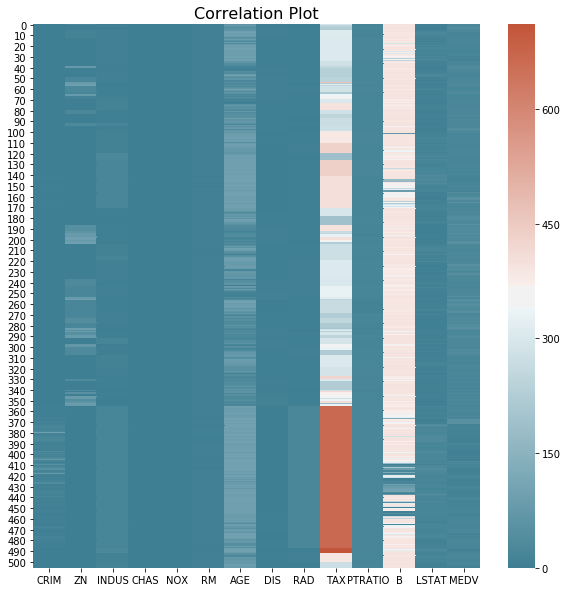

In [6]:
fig, ax = pl.subplots(figsize=(10,10))
pl.title("Correlation Plot",fontsize=16)
sns.heatmap(df_boston,cmap=sns.diverging_palette(220, 20, sep=10, as_cmap=True))

In [7]:
#Correlation between attributes
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df_boston.corr(method='pearson')
print(correlations)

          CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  PTRATIO      B  \
CRIM     1.000 -0.199  0.404 -0.055  0.418 -0.220  0.351 -0.378  0.622  0.580    0.288 -0.377   
ZN      -0.199  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   -0.392  0.176   
INDUS    0.404 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721    0.383 -0.357   
CHAS    -0.055 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   -0.122  0.049   
NOX      0.418 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668    0.189 -0.380   
RM      -0.220  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   -0.356  0.128   
AGE      0.351 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506    0.262 -0.274   
DIS     -0.378  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   -0.232  0.292   
RAD      0.622 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910    0.465 -0.444   
TAX      0.580 -0.315  0.721 -

In [8]:
#Skewness
df_boston.skew() #The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

CRIM       5.238
ZN         2.226
INDUS      0.295
CHAS       3.406
NOX        0.729
RM         0.404
AGE       -0.599
DIS        1.012
RAD        1.005
TAX        0.670
PTRATIO   -0.802
B         -2.890
LSTAT      0.906
MEDV       1.108
dtype: float64

In [9]:
# Number of houses and features in the dataset
total_houses, total_features = boston.data.shape

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = housing_prices.std()

# Show the calculated statistics
print("Boston Housing dataset statistics (in $1000's):\n")
print("Total number of houses:", total_houses)
print("Total number of features:", total_features)
print("Minimum house price:", minimum_price)
print("Maximum house price:", maximum_price)
print("Mean house price: {0:.3f}".format(mean_price))
print("Median house price:", median_price)
print("Standard deviation of house price: {0:.3f}".format(std_dev))

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


In [10]:
print(CLIENT_FEATURES)

[[13.44, 0.0, 18.587, 0, 0.7858, 4.888, 82.0, 1.655, 23, 566.0, 18.65, 400.05, 14.58]]


In [11]:
print('Client CRIM = ' + str(CLIENT_FEATURES[0][0]))
print('Client RAD = ' + str(CLIENT_FEATURES[0][8])) 
print('Client B = ' + str(CLIENT_FEATURES[0][11]))

Client CRIM = 13.44
Client RAD = 23
Client B = 400.05



## Picking evaluation method 


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def shuffle_split_data(X, y):
    """ 
    Shuffles and splits data into 70% training and 30% testing subsets,
    then returns the training and testing subsets. 
    """
    # Shuffled data
    X_s, y_s = shuffle(X, y, random_state=0)

    # Split the data into training (70%) and testing (30%)
    X_train, X_test, y_train, y_test = train_test_split(X_s, y_s,
                                                        test_size=0.3,
                                                        random_state=0)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, 
                                                          housing_prices)
    print("Successfully shuffled and split the data!")
except:
    print("Something went wrong with shuffling and splitting the data.")
    
print("Shape of training data: ", X_train.shape)
print("Shape of training target: ", y_train.shape)
print("Shape of testing data: ", X_test.shape)
print("Shape of testing target: ", y_test.shape)

Successfully shuffled and split the data!
Shape of training data:  (354, 13)
Shape of training target:  (354,)
Shape of testing data:  (152, 13)
Shape of testing target:  (152,)


In [13]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def performance_metric(y_true, y_predict):
    """ 
    Calculates and returns the total error between true 
    and predicted values
    based on a performance metric chosen by the student. 
    """
    error = MAE(y_true, y_predict)
    return error

# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print("Successfully performed a metric calculation!")
except:
    print("Something went wrong with performing a metric calculation.")

Successfully performed a metric calculation!


In [14]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """
    Tunes a decision tree regressor 
    model using GridSearchCV on the input data X 
    and target labels y and returns this optimal model.
    """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, 
                                   greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, 
                       scoring_function)

    # Fit the learner to the data to obtain the optimal 
    # model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_

# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print("Successfully fit a model!")
except:
    print("Something went wrong with fitting a model.")

Successfully fit a model!



## Analyzing Model Performance


In [15]:
def learning_curves(X_train, y_train, X_test, y_test):
    """
    Calculates the performance of several models with 
    varying sizes of training data. The learning and testing 
    error rates for each model are then plotted. 
    """
    
    print("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that 
    # we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that 
            # it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], 
                                              regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, 
                                             regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', 
                 fontsize=18, y=1.03)
    fig.tight_layout()
    pl.show()

In [16]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ 
    Calculates the performance of the model 
    as model complexity increases. The learning and 
    testing errors rates are then plotted. 
    """
    
    print("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree 
    # model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns 
        # a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, 
                                          regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, 
                                         regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


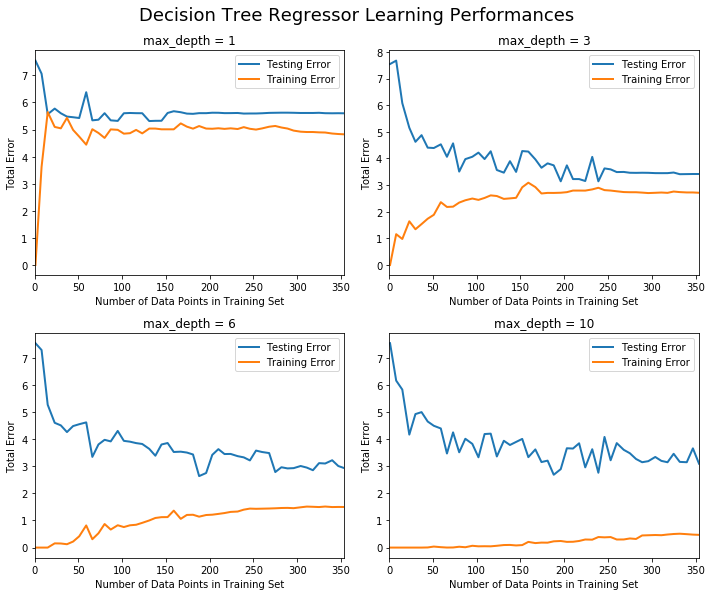

In [17]:
learning_curves(X_train, y_train, X_test, y_test)

Creating a model complexity graph. . . 


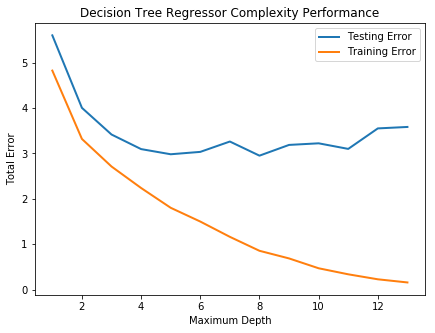

In [18]:
model_complexity(X_train, y_train, X_test, y_test)


## Model Prediction


In [19]:
max_depths = []
for _ in range(100):
    reg = fit_model(housing_features, housing_prices)
    max_depths.append(reg.get_params()['max_depth'])
print("GridSearchCV max_depth result for DecisionTreeRegression model: ")
print("Median:", np.median(max_depths))
print("Mean:", np.mean(max_depths), ", Standard deviation:", np.std(max_depths))

GridSearchCV max_depth result for DecisionTreeRegression model: 
Median: 5.0
Mean: 5.16 , Standard deviation: 1.1110355529864921


In [20]:
sale_price = reg.predict(CLIENT_FEATURES)
print("Predicted value of client's home: {0:.3f}".format(sale_price[0]))

Predicted value of client's home: 10.900
